C:\Users\s.shugo\AppData\Local\Temp\ipykernel_28928\3764357654.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['銘柄名'] = df_stock['銘柄名'].str[:6]
C:\Users\s.shugo\AppData\Local\Temp\ipykernel_28928\3764357654.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['33業種区分'] = df_stock['33業種区分'].str[:6]


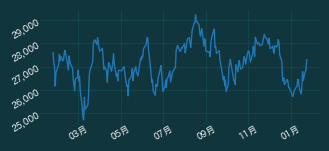

In [67]:
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import colors
# %matplotlib inline
import japanize_matplotlib
from PIL import Image, ImageFont, ImageDraw
from decimal import Decimal, ROUND_HALF_UP

output_dir = '/output/'
tmp_file = output_dir+'tmp.png'
icon_file = './pictures/icon_mame.png'
jap_font = './fonts/YuGothM.ttc'
YuB_font = './fonts/YuGothB.ttc'
jap_fontb = './fonts/meiryob.ttc'
nikkei_code = './data/data_j.xls'
pickup_list = [
    1928,
    2124,
    2914,
    3817,
    5334,
    8001,
    8031,
    8058,
    8306,
    8316,
    8591,
    8750,
    8766,
    9432,
    9436,
]

higenpai_list = [
    1969,
    2264,
    2502,
    2503,
    2533,
    2815,
    3105,
    3941,
    4021,
    4063,
    4118,
    4202,
    4272,
    4452,
    4502,
    4507,
    4521,
    4523,
    4536,
    4543,
    4559,
    4628,
    4919,
    4966,
    5194,
    5831,
    5943,
    5946,
    6376,
    6454,
    7564,
    7741,
    8194,
    8218,
    8233,
    8267,
    8273,
    8331,
    8566,
    8593,
    8830,
    9433,
    9531,
    9532,
    9533,
    9719,
    9746,
    9843,
    9948,
    9974,
]

df = pd.read_excel(nikkei_code)
df_stock = df[['コード','銘柄名','33業種区分']]
df_stock['銘柄名'] = df_stock['銘柄名'].str[:6]
df_stock['33業種区分'] = df_stock['33業種区分'].str[:6]
df_pick = df_stock[df_stock['コード'].isin(pickup_list)]
df_higenpai = df_stock[df_stock['コード'].isin(higenpai_list)]
df_pick.reset_index(drop=True,inplace=True)
df_higenpai.reset_index(drop=True,inplace=True)

pick_dict = dict(zip(df_pick['コード'],zip(df_pick['銘柄名'],df_pick['33業種区分'])))
higenpai_dict = dict(zip(df_higenpai['コード'],zip(df_higenpai['銘柄名'],df_higenpai['33業種区分'])))

df_nikkei = si.get_data('^N225')
years_ago = str(date.today().year-1) + str(date.today())[4:]
df_nikkei = pd.DataFrame(df_nikkei[years_ago:]['adjclose'].map(lambda x: float(Decimal(str(x)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP))))
diff_day = 1
x_width = 960
y_width = 1280
theme_color = (16, 53, 61)
text_color = (245, 245, 245)

im = Image.new("RGB",(x_width, y_width), theme_color)
draw = ImageDraw.Draw(im)
img = Image.open(icon_file).copy()
icon = img.resize((65,65))

im.paste(icon,(40,30), mask=icon)

draw.text((360, 40), '高配当株', text_color, anchor='mm', font=ImageFont.truetype(YuB_font, 40))
draw.text((360, 100), 'ヒートマップ', text_color, anchor='mm', font=ImageFont.truetype(YuB_font, 40))
draw.text((20, 95), 'まめ@oghu_fire', text_color, font=ImageFont.truetype(jap_font, 16))
draw.text((10, 5), "更新日: "+str(date.today()), text_color, font=ImageFont.truetype(jap_font, 15))



def get_rgb(limit, value):
    if(value<=-limit): return (244,53,56)
    if(value>=limit): return (48,204,90)
    if(value==0): return (65,69,84)
    if(np.isnan(value)): return (65,69,84)
    color_list = sns.diverging_palette(12, 150, sep=1, n=100, center="dark")
    rgb=color_list[50+int(value/limit*50)]
    return (int(rgb[0]*255*1.5),int(rgb[1]*255*1.5),int(rgb[2]*255*1.5))


def draw_heatmap(stock_dict, x_start, y_start):
    cnt_stock = 0
    for name in stock_dict.keys():
        x_pos = x_start + 10 + 132*(cnt_stock%7)
        y_pos = y_start + 30 + 95*(cnt_stock//7)
        
        data = si.get_data(str(name)+'.T')["adjclose"]
        data_value = "{:,.0f}".format(data[-1])
        data_pct = data.pct_change(diff_day)
        pct = data_pct.iat[-1]
        pct_chg = "{:+.2%}".format(pct)
        
        draw.rectangle([(x_pos, y_pos), (x_pos+130, y_pos+93)], fill=get_rgb(0.02,pct))
        draw.text((x_pos+5, y_pos+2), str(name), 'white', font=ImageFont.truetype(jap_font, 12))
        draw.text((x_pos+65, y_pos+40), stock_dict[name][0], 'white', anchor='mm', font=ImageFont.truetype(YuB_font, 19))
        draw.text((x_pos+95, y_pos+75), '('+pct_chg+')', 'white', anchor='mm', font=ImageFont.truetype(jap_font, 14))
        draw.text((x_pos+35, y_pos+75), data_value, 'white', anchor='mm', font=ImageFont.truetype(jap_font, 20))
        
        l = draw.textlength(stock_dict[name][1], font=ImageFont.truetype(jap_font, 12))
        draw.text((x_pos+130-l-2, y_pos+2), stock_dict[name][1], 'white', font=ImageFont.truetype(jap_font, 12))
        
        cnt_stock += 1


aria1_x_start = 8
aria1_y_start = 140
aria1_x_end = 950
aria1_y_end = 940
draw.rounded_rectangle([(aria1_x_start, aria1_y_start), (aria1_x_end, aria1_y_end)], radius=10, fill=(19, 67, 77))
draw.text((aria1_x_start+5, aria1_y_start+5), '25年以上非減配', (240, 245, 154), font=ImageFont.truetype(YuB_font, 20))

draw_heatmap(higenpai_dict, aria1_x_start, aria1_y_start)




aria2_x_start = aria1_x_start
aria2_y_start = 950
aria2_x_end = aria1_x_end
aria2_y_end = 1270
cnt_stock = 0
draw.rounded_rectangle([(aria2_x_start, aria2_y_start), (aria2_x_end, aria2_y_end)], radius=10, fill=(19, 67, 77))
draw.text((aria2_x_start+5, aria2_y_start+5), 'Pick Up 銘柄', (240, 245, 154), font=ImageFont.truetype(YuB_font, 20))

draw_heatmap(pick_dict, aria2_x_start, aria2_y_start)
import matplotlib.dates as mdates

def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb
def rgb_to_01(rgb):
    return [x/255 for x in rgb]

fig, ax = plt.subplots(figsize=(3.6,1.5))
fig.set_facecolor(rgb_to_01(theme_color))
ax.set_facecolor(rgb_to_01(theme_color))
ax.tick_params(labelcolor=rgb_to_01((247, 247, 247)),labelsize=6.5,bottom=False,left=False, labelrotation=30)
ax.spines[['left','right','top','bottom']].set_visible(False)
ax.grid(color=rgb_to_01((19, 67, 77)),linestyle='-')
ax.get_xaxis().set_tick_params(pad=-5)
ax.get_yaxis().set_tick_params(pad=-4)

f = mdates.DateFormatter('%m月')
ax.xaxis.set_major_formatter(f)
ax.yaxis.set_major_formatter('{x:,.0f}')

nikkei_chart_x_start = x_width-330
nikkei_pct_value = df_nikkei.pct_change()[-1:].iat[0,0]
nikkei_pct = '{:+.2%}'.format(nikkei_pct_value)


plt.plot(df_nikkei,linewidth=1)
plt.savefig('nikkei_chart.png')
im.paste(Image.open('nikkei_chart.png'),(nikkei_chart_x_start,-15))

draw.rounded_rectangle(
    [(nikkei_chart_x_start-95, 5), (nikkei_chart_x_start+5, 60)],
    radius=10, fill=(19, 67, 77)
    )
draw.text((nikkei_chart_x_start-90, 10), '日経平均', text_color, font=ImageFont.truetype(jap_font, 16))
draw.text((nikkei_chart_x_start-60, 35), nikkei_pct, get_rgb(0.02,1000*nikkei_pct_value), font=ImageFont.truetype(jap_font, 18))

im.save('heatmap.png')